### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

### Variable to calculate: Mean Southern Ocean salinity (psu) in the SPSS biome, see RECCAP mask in google folder (variable name ‘southern’, value=2)

### Let's look at the RECCAP regional mask

In [ ]:
w = xr.open_dataset('./RECCAP2_region_masks_all_v20221025.nc')

Text(0.5, 1.0, 'SPSS biome = 2')

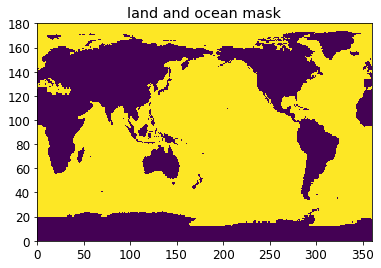

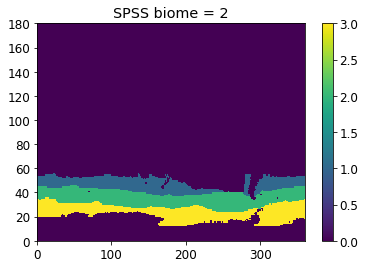

In [16]:
plt.figure()
plt.pcolormesh(w.seamask)
plt.title('land and ocean mask')
plt.figure()
q = plt.pcolormesh(w.southern)
plt.colorbar(q)
plt.title('SPSS biome = 2')

## step 1) - get sos (surface salinity) in runGCB.bsub 

    `python createGCB_RECCAP.py 9 #varID 13 sos`

In [23]:
sim = 'A'
w2 = xr.open_dataset(f'/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/CAL12/sos_PlankTOM_{sim}_1_gr_1959-2022_v20230707.nc')

tdat = w2.sos.values
tlen = (np.shape(tdat))[0] #length of timeseries

for i in range(0,1):#tlen):
    tsos = tdat[i,:,:]
    print(np.shape(tsos))
    print(tlen)

(180, 360)
768


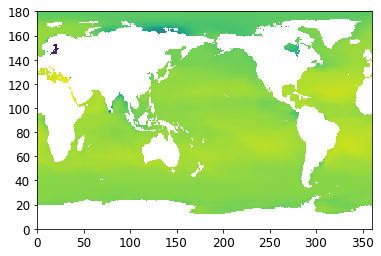

In [18]:
plt.pcolormesh(w2.sos[0,:,:])

